In [1]:
import sys
sys.path.append('/g/g92/yi10')
import llsmvis
from llsmvis.extensions import hp3d
from matplotlib import pyplot as plt
import matplotlib
from skimage import io
from scipy import ndimage
import numpy as np
import copy
from scipy.signal import argrelextrema
%load_ext autoreload
%autoreload 2
import os

Loading BokehJS ...

In [2]:
# ticket information (the output files from the interactive trimming results, see E1 for details)
tpath='/g/g92/yi10/CroppingData'
theads = [t.split('_fpath.txt')[0] for t in os.listdir(tpath) if t.endswith('fpath.txt')]
# separate theads into 2 groups, one is naive macrophage, the other one is infected macrophage.
theads_naive_macr=[]
theads_Lg_macr_cl=[]

for i, thead in enumerate(theads):
    if thead.startswith('2021-09-'):
        theads_naive_macr.append(thead)
    
    if thead.startswith('2021-10-01'):
        theads_naive_macr.append(thead)
    
    if thead.startswith('2021-10-04'):
        theads_naive_macr.append(thead)
    
    if thead.startswith('2021-10-06'):
        theads_naive_macr.append(thead)
    
    if thead.startswith('2021-10-08'):
        theads_naive_macr.append(thead)
    
    if thead.startswith('2021-10-14'):
        theads_naive_macr.append(thead)
    
    if thead.startswith('2021-10-28'):
        theads_Lg_macr_cl.append(thead)
    
    if thead.startswith('2021-10-29'):
        theads_Lg_macr_cl.append(thead)
    
    if thead.startswith('2021-11-'):
        theads_Lg_macr_cl.append(thead)
    
    

In [3]:
ds_naive=[]
for thead in theads_naive_macr:
# thead=theads[0]
    tlist=hp3d.croproi3d.get_trimmed_tiff_list(tpath, thead)
    hp3ddata_path='/p/lscratchh/yi10/hp3d/'+thead
    d=hp3d.hp3ddata.HP3Ddata(fpath=hp3ddata_path,dfnamehead='hp3ddata_'+thead,initialize=False)
    ds_naive.append(d)

Try to create the following file path:
/p/lscratchh/yi10/hp3d/2021-09-24-cell3
the file path exists
found the hdf5 file:
/p/lscratchh/yi10/hp3d/2021-09-24-cell3/hp3ddata_2021-09-24-cell3.hdf5
successfully opened the hp3d data object and the associated hdf5 file
Try to create the following file path:
/p/lscratchh/yi10/hp3d/2021-09-24-cell0
the file path exists
found the hdf5 file:
/p/lscratchh/yi10/hp3d/2021-09-24-cell0/hp3ddata_2021-09-24-cell0.hdf5
successfully opened the hp3d data object and the associated hdf5 file
Try to create the following file path:
/p/lscratchh/yi10/hp3d/2021-09-24-cell10
the file path exists
found the hdf5 file:
/p/lscratchh/yi10/hp3d/2021-09-24-cell10/hp3ddata_2021-09-24-cell10.hdf5
successfully opened the hp3d data object and the associated hdf5 file
Try to create the following file path:
/p/lscratchh/yi10/hp3d/2021-09-24-cell11
the file path exists
found the hdf5 file:
/p/lscratchh/yi10/hp3d/2021-09-24-cell11/hp3ddata_2021-09-24-cell11.hdf5
successfully ope

the file path exists
found the hdf5 file:
/p/lscratchh/yi10/hp3d/2021-09-30-cell13/hp3ddata_2021-09-30-cell13.hdf5
successfully opened the hp3d data object and the associated hdf5 file
Try to create the following file path:
/p/lscratchh/yi10/hp3d/2021-09-30-cell1
the file path exists
found the hdf5 file:
/p/lscratchh/yi10/hp3d/2021-09-30-cell1/hp3ddata_2021-09-30-cell1.hdf5
successfully opened the hp3d data object and the associated hdf5 file
Try to create the following file path:
/p/lscratchh/yi10/hp3d/2021-09-30-cell2
the file path exists
found the hdf5 file:
/p/lscratchh/yi10/hp3d/2021-09-30-cell2/hp3ddata_2021-09-30-cell2.hdf5
successfully opened the hp3d data object and the associated hdf5 file
Try to create the following file path:
/p/lscratchh/yi10/hp3d/2021-09-30-cell3
the file path exists
found the hdf5 file:
/p/lscratchh/yi10/hp3d/2021-09-30-cell3/hp3ddata_2021-09-30-cell3.hdf5
successfully opened the hp3d data object and the associated hdf5 file
Try to create the following f

successfully opened the hp3d data object and the associated hdf5 file
Try to create the following file path:
/p/lscratchh/yi10/hp3d/2021-10-04-cell7
the file path exists
found the hdf5 file:
/p/lscratchh/yi10/hp3d/2021-10-04-cell7/hp3ddata_2021-10-04-cell7.hdf5
successfully opened the hp3d data object and the associated hdf5 file
Try to create the following file path:
/p/lscratchh/yi10/hp3d/2021-10-04-cell8
the file path exists
found the hdf5 file:
/p/lscratchh/yi10/hp3d/2021-10-04-cell8/hp3ddata_2021-10-04-cell8.hdf5
successfully opened the hp3d data object and the associated hdf5 file
Try to create the following file path:
/p/lscratchh/yi10/hp3d/2021-10-04-cell9
the file path exists
found the hdf5 file:
/p/lscratchh/yi10/hp3d/2021-10-04-cell9/hp3ddata_2021-10-04-cell9.hdf5
successfully opened the hp3d data object and the associated hdf5 file
Try to create the following file path:
/p/lscratchh/yi10/hp3d/2021-10-06-cell0
the file path exists
found the hdf5 file:
/p/lscratchh/yi10/hp3d/

Try to create the following file path:
/p/lscratchh/yi10/hp3d/2021-09-22-cell13
the file path exists
found the hdf5 file:
/p/lscratchh/yi10/hp3d/2021-09-22-cell13/hp3ddata_2021-09-22-cell13.hdf5
successfully opened the hp3d data object and the associated hdf5 file
Try to create the following file path:
/p/lscratchh/yi10/hp3d/2021-09-22-cell19
the file path exists
found the hdf5 file:
/p/lscratchh/yi10/hp3d/2021-09-22-cell19/hp3ddata_2021-09-22-cell19.hdf5
successfully opened the hp3d data object and the associated hdf5 file
Try to create the following file path:
/p/lscratchh/yi10/hp3d/2021-09-22-cell20
the file path exists
found the hdf5 file:
/p/lscratchh/yi10/hp3d/2021-09-22-cell20/hp3ddata_2021-09-22-cell20.hdf5
successfully opened the hp3d data object and the associated hdf5 file
Try to create the following file path:
/p/lscratchh/yi10/hp3d/2021-09-22-cell24
the file path exists
found the hdf5 file:
/p/lscratchh/yi10/hp3d/2021-09-22-cell24/hp3ddata_2021-09-22-cell24.hdf5
successful

In [4]:
ds_infec=[]
for thead in theads_Lg_macr_cl:
# thead=theads[0]
    tlist=hp3d.croproi3d.get_trimmed_tiff_list(tpath, thead)
    hp3ddata_path='/p/lscratchh/yi10/hp3d/'+thead
    d=hp3d.hp3ddata.HP3Ddata(fpath=hp3ddata_path,dfnamehead='hp3ddata_'+thead,initialize=False)
    ds_infec.append(d)

Try to create the following file path:
/p/lscratchh/yi10/hp3d/2021-11-17-cell0
the file path exists
found the hdf5 file:
/p/lscratchh/yi10/hp3d/2021-11-17-cell0/hp3ddata_2021-11-17-cell0.hdf5
successfully opened the hp3d data object and the associated hdf5 file
Try to create the following file path:
/p/lscratchh/yi10/hp3d/2021-10-28-cell0
the file path exists
found the hdf5 file:
/p/lscratchh/yi10/hp3d/2021-10-28-cell0/hp3ddata_2021-10-28-cell0.hdf5
successfully opened the hp3d data object and the associated hdf5 file
Try to create the following file path:
/p/lscratchh/yi10/hp3d/2021-10-28-cell1
the file path exists
found the hdf5 file:
/p/lscratchh/yi10/hp3d/2021-10-28-cell1/hp3ddata_2021-10-28-cell1.hdf5
successfully opened the hp3d data object and the associated hdf5 file
Try to create the following file path:
/p/lscratchh/yi10/hp3d/2021-10-28-cell2
the file path exists
found the hdf5 file:
/p/lscratchh/yi10/hp3d/2021-10-28-cell2/hp3ddata_2021-10-28-cell2.hdf5
successfully opened th

found the hdf5 file:
/p/lscratchh/yi10/hp3d/2021-11-09-cell13/hp3ddata_2021-11-09-cell13.hdf5
successfully opened the hp3d data object and the associated hdf5 file
Try to create the following file path:
/p/lscratchh/yi10/hp3d/2021-11-09-cell1
the file path exists
found the hdf5 file:
/p/lscratchh/yi10/hp3d/2021-11-09-cell1/hp3ddata_2021-11-09-cell1.hdf5
successfully opened the hp3d data object and the associated hdf5 file
Try to create the following file path:
/p/lscratchh/yi10/hp3d/2021-11-09-cell2
the file path exists
found the hdf5 file:
/p/lscratchh/yi10/hp3d/2021-11-09-cell2/hp3ddata_2021-11-09-cell2.hdf5
successfully opened the hp3d data object and the associated hdf5 file
Try to create the following file path:
/p/lscratchh/yi10/hp3d/2021-11-09-cell3
the file path exists
found the hdf5 file:
/p/lscratchh/yi10/hp3d/2021-11-09-cell3/hp3ddata_2021-11-09-cell3.hdf5
successfully opened the hp3d data object and the associated hdf5 file
Try to create the following file path:
/p/lscratch

successfully opened the hp3d data object and the associated hdf5 file
Try to create the following file path:
/p/lscratchh/yi10/hp3d/2021-11-12-cell10
the file path exists
found the hdf5 file:
/p/lscratchh/yi10/hp3d/2021-11-12-cell10/hp3ddata_2021-11-12-cell10.hdf5
successfully opened the hp3d data object and the associated hdf5 file
Try to create the following file path:
/p/lscratchh/yi10/hp3d/2021-11-12-cell11
the file path exists
found the hdf5 file:
/p/lscratchh/yi10/hp3d/2021-11-12-cell11/hp3ddata_2021-11-12-cell11.hdf5
successfully opened the hp3d data object and the associated hdf5 file
Try to create the following file path:
/p/lscratchh/yi10/hp3d/2021-11-12-cell1
the file path exists
found the hdf5 file:
/p/lscratchh/yi10/hp3d/2021-11-12-cell1/hp3ddata_2021-11-12-cell1.hdf5
successfully opened the hp3d data object and the associated hdf5 file
Try to create the following file path:
/p/lscratchh/yi10/hp3d/2021-11-12-cell3
the file path exists
found the hdf5 file:
/p/lscratchh/yi10

In [5]:
def plot_trajs_50t(hp3ddata_h_list, fig=[], ax=[], 
                   cl='k',
                   ttstr='volume center trajecotires', 
                   oop=False, 
                   op='./volume_center_traj_compiled.png',
                   TNini=0, 
                   TNend=50):
    trajs=[]
#     fig = plt.figure(figsize=(8, 8))
#     ax = fig.gca(projection='3d')
    for  hp3ddata_h in hp3ddata_h_list:
        list_c0 = np.asarray(hp3ddata_h.h5f["[D9] volume centers"])
        list_c=list_c0-list_c0[0,:]
        trajs.append(list_c)
        x = []
        y = []
        z = []
        tt = np.arange(0, len(list_c))
        for c in list_c:
            x.append(c[0])
            y.append(c[1])
            z.append(c[2])
        col = tt
        ax.plot(x[TNini:TNend], y[TNini:TNend], z[TNini:TNend], color=cl, alpha=0.2) # main 3D curves
        
        ax.plot(x[TNini:TNend], y[TNini:TNend], np.ones(len(z[TNini:TNend]))*-300, color=cl, alpha=0.05) # projections
        ax.plot(x[TNini:TNend], np.ones(len(z[TNini:TNend]))*300, z[TNini:TNend], color=cl, alpha=0.05) # projections
        ax.plot(np.ones(len(z[TNini:TNend]))*-300, y[TNini:TNend], z[TNini:TNend], color=cl, alpha=0.05) # projections
#         ax.scatter(x[TNini:TNend], y[TNini:TNend], z[TNini:TNend], marker='o', c=col[TNini:TNend], s=50, cmap='cool', edgecolors=cl, alpha=0.01)
    
    ax.set_xlim([-300, 300])
    ax.set_ylim([-300, 300])
    ax.set_zlim([-300, 300])

#     plt.title(ttstr, fontsize=20)
    if oop is True:
        plt.savefig(op,transparent=True)
#     plt.show()
    return np.asarray(trajs)

Text(0.5, 0, 'X')

Text(0.5, 0, 'Y')

Text(0.5, 0, 'Z')

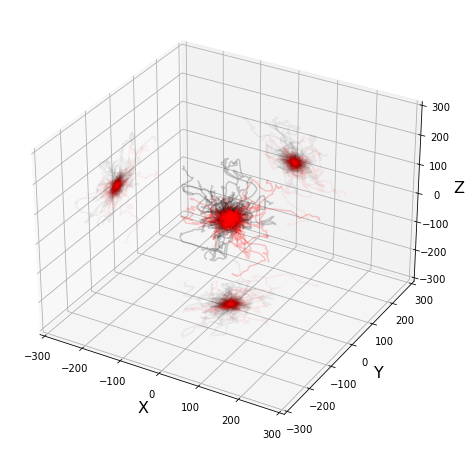

In [6]:
fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')
trajs_naive=plot_trajs_50t(ds_naive,fig, ax, cl='k',TNini=0, TNend=50,ttstr='naive macropahge')
trajs_infec=plot_trajs_50t(ds_infec,fig, ax, cl='r',TNini=0, TNend=50,ttstr='infected macropahge')
ax.set_xlabel('X',fontsize=16)
ax.set_ylabel('Y',fontsize=16)
ax.set_zlabel('Z',fontsize=16)
ax.set_xticks([-300,-200,-100,0,100,200,300])
ax.set_yticks([-300,-200,-100,0,100,200,300])
ax.set_zticks([-300,-200,-100,0,100,200,300])
plt.show()

Text(0.5, 0, 'X')

Text(0.5, 0, 'Y')

Text(0.5, 0, 'Z')

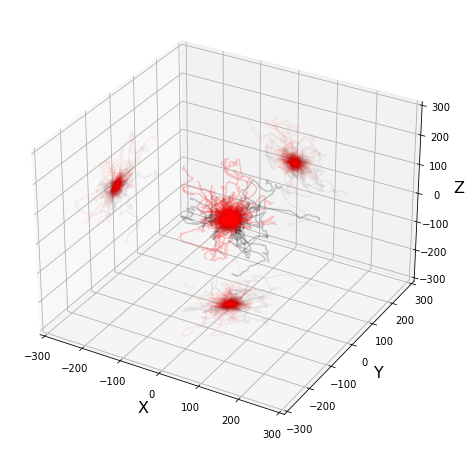

In [145]:
fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')
trajs_infec=plot_trajs_50t(ds_infec,fig, ax, cl='k',TNini=0, TNend=50,ttstr='infected macropahge')
trajs_naive=plot_trajs_50t(ds_naive,fig, ax, cl='r',TNini=0, TNend=50,ttstr='naive macropahge')
ax.set_xlabel('X',fontsize=16)
ax.set_ylabel('Y',fontsize=16)
ax.set_zlabel('Z',fontsize=16)
ax.set_xticks([-300,-200,-100,0,100,200,300])
ax.set_yticks([-300,-200,-100,0,100,200,300])
ax.set_zticks([-300,-200,-100,0,100,200,300])
plt.show()

In [7]:
# try to get mean square displacement
MSD_naive=[]
MSD_infec=[]

for ti in np.arange(50):
    MSD_naive.append(np.mean(trajs_naive[:,ti,:]**2, axis=0))
    MSD_infec.append(np.mean(trajs_infec[:,ti,:]**2, axis=0))

MSD_naive=np.asarray(MSD_naive)
MSD_infec=np.asarray(MSD_infec)


In [8]:
MSD_naive.shape

(50, 3)

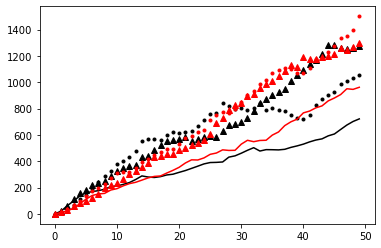

In [9]:
plt.plot(MSD_naive[:,0],'k')
plt.plot(MSD_naive[:,1],'k.')
plt.plot(MSD_naive[:,2],'k^')

plt.plot(MSD_infec[:,0],'r')
plt.plot(MSD_infec[:,1],'r.')
plt.plot(MSD_infec[:,2],'r^')



<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'X SD')

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Y SD')

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Z SD')

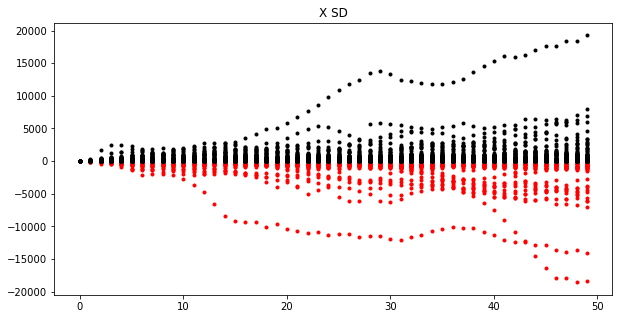

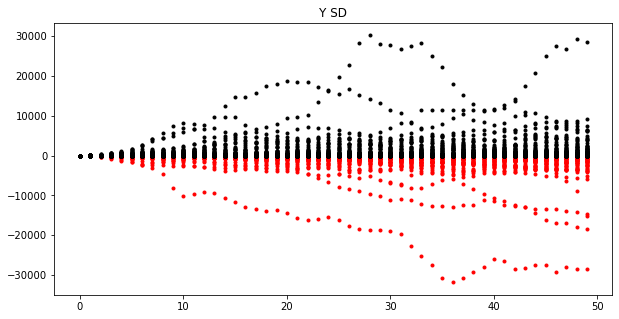

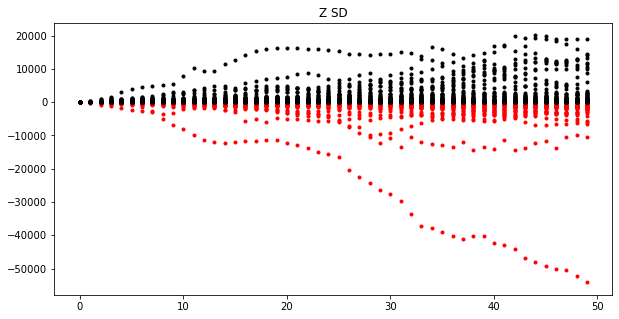

In [146]:
plt.figure(figsize=(10,5))
for ti in np.arange(50):
    tk=trajs_naive[:,ti,:]
    tr=trajs_infec[:,ti,:]
    plt.plot(np.ones(len(tr[:,1]))*ti,-tr[:,0]**2,'r.')
    plt.plot(np.ones(len(tk[:,1]))*ti,tk[:,0]**2,'k.')
plt.title('X SD')


plt.figure(figsize=(10,5))
for ti in np.arange(50):
    tk=trajs_naive[:,ti,:]
    tr=trajs_infec[:,ti,:]
    plt.plot(np.ones(len(tr[:,1]))*ti,-tr[:,1]**2,'r.')
    plt.plot(np.ones(len(tk[:,1]))*ti,tk[:,1]**2,'k.')
plt.title('Y SD')

plt.figure(figsize=(10,5))
for ti in np.arange(50):
    tk=trajs_naive[:,ti,:]
    tr=trajs_infec[:,ti,:]
    plt.plot(np.ones(len(tr[:,1]))*ti,-tr[:,2]**2,'r.')
    plt.plot(np.ones(len(tk[:,1]))*ti,tk[:,2]**2,'k.')
plt.title('Z SD')




In [11]:
trajs_naive.shape

(133, 50, 3)

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'X SD')

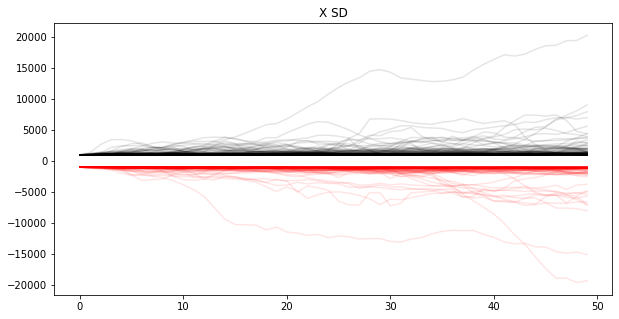

In [12]:
plt.figure(figsize=(10,5))
for ti in np.arange(len(trajs_naive[:,1,1])):
    tk=trajs_naive[ti,:,:]
    plt.plot(tk[:,0]**2+1000,'k-',alpha=0.1)
    
for ti in np.arange(len(trajs_infec[:,1,1])):
    tr=trajs_infec[ti,:,:]
    plt.plot(-tr[:,0]**2-1000,'r-',alpha=0.1)
    
plt.title('X SD')

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Y SD')

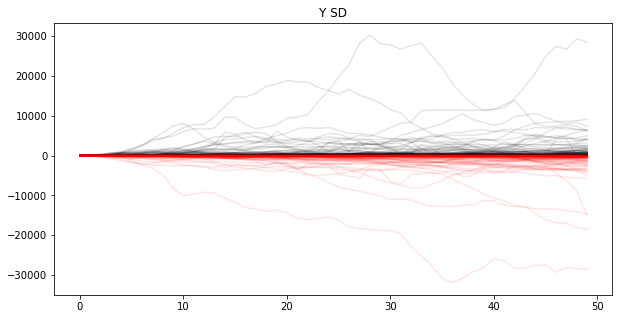

In [13]:
plt.figure(figsize=(10,5))
for ti in np.arange(len(trajs_naive[:,1,1])):
    tk=trajs_naive[ti,:,:]
    plt.plot(tk[:,1]**2,'k-',alpha=0.1)
    
for ti in np.arange(len(trajs_infec[:,1,1])):
    tr=trajs_infec[ti,:,:]
    plt.plot(-tr[:,1]**2,'r-',alpha=0.1)
    
plt.title('Y SD')

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Z SD')

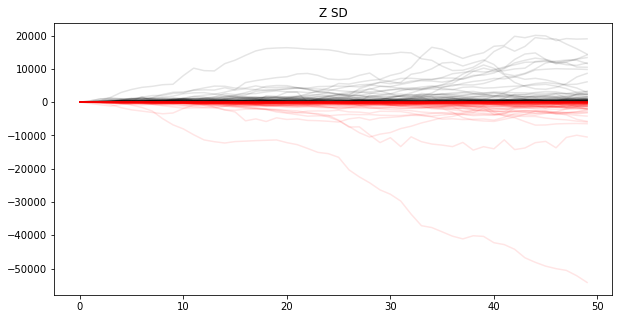

In [14]:
plt.figure(figsize=(10,5))
for ti in np.arange(len(trajs_naive[:,1,1])):
    tk=trajs_naive[ti,:,:]
    plt.plot(tk[:,2]**2,'k-',alpha=0.1)
    
for ti in np.arange(len(trajs_infec[:,1,1])):
    tr=trajs_infec[ti,:,:]
    plt.plot(-tr[:,2]**2,'r-',alpha=0.1)
    
plt.title('Z SD')

In [15]:
trajs_infec.shape

(101, 50, 3)

(0.0, 50.0)

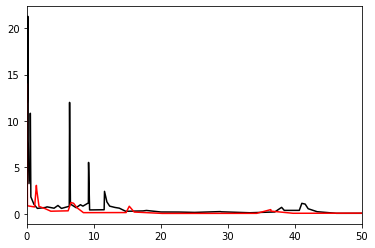

In [16]:
ti=49
a=np.sort(trajs_naive[:,ti,1]**2)
p=1/(a[2:]-a[:-2])
plt.plot(a[1:-1],p,'k')
a=np.sort(trajs_infec[:,ti,1]**2)
p=1/(a[2:]-a[:-2])
plt.plot(a[1:-1],p,'r')
plt.xlim(0,50)


In [17]:
trajs_infec.shape


(101, 50, 3)

In [18]:
b=trajs_infec[:,10,1]**2

In [19]:
# input a list, return the distribution profile

In [20]:
def get_proj_curve(b,c,markertype='-'):
    k=np.sort(b)
    [p,q]=np.histogram(k,bins=np.arange(0,10000,500),density='True')
    plt.plot(q[1:],p**0.1,markertype,color=c)


<Figure size 720x360 with 0 Axes>

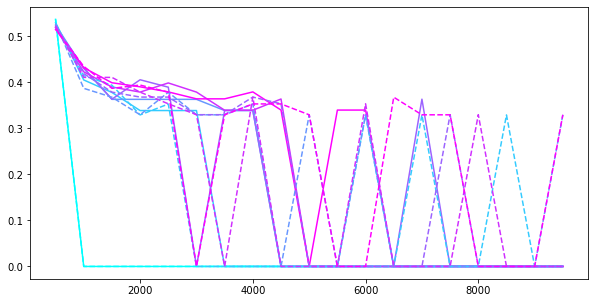

In [21]:
# sort the sequence
import matplotlib as mpl
a=mpl.cm.get_cmap('cool')
cinds=np.linspace(0,1,50)
inds=list(np.arange(0,50,10))+[49]
tt = np.arange(0, 6)
plt.figure(figsize=(10,5))
for ind in inds:
    get_proj_curve(trajs_infec[:,ind,1]**2,c=a(cinds[ind]))

# plt.figure(figsize=(10,5))
for ind in inds:
    get_proj_curve(trajs_naive[:,ind,1]**2,c=a(cinds[ind]),markertype='--')


In [22]:
inds

[0, 10, 20, 30, 40, 49]

In [23]:
[p,q]=np.histogram(k,bins=np.arange(0,10000,200))

NameError: name 'k' is not defined

In [ ]:
plt.plot(p)

In [ ]:
len(q)

In [ ]:
trajs_naive.shape

In [24]:
stds_naive=[]
stds_infec=[]

for ti in np.arange(0,50):
    x=np.std(trajs_naive[:,ti,0])
    y=np.std(trajs_naive[:,ti,1])
    z=np.std(trajs_naive[:,ti,2])
    stds_naive.append([x,y,z])
    x1=np.std(trajs_infec[:,ti,0])
    y1=np.std(trajs_infec[:,ti,1])
    z1=np.std(trajs_infec[:,ti,2])
    stds_infec.append([x1,y1,z1])



Text(0.5, 1.0, 'standard deviation of vc displacement')

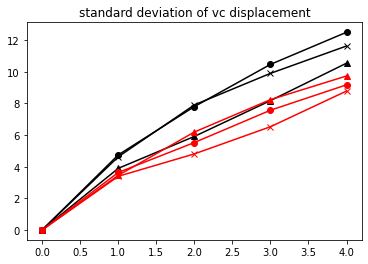

In [41]:
n=np.asarray(stds_naive)
i=np.asarray(stds_infec)

plt.plot(n[:5,0],'k-x')
plt.plot(i[:5,0],'r-x')
plt.plot(n[:5,1],'k-^')
plt.plot(i[:5,1],'r-^')
plt.plot(n[:5,2],'k-o')
plt.plot(i[:5,2],'r-o')
plt.title('standard deviation of vc displacement')

Text(0.5, 1.0, 'standard deviation of vc displacement')

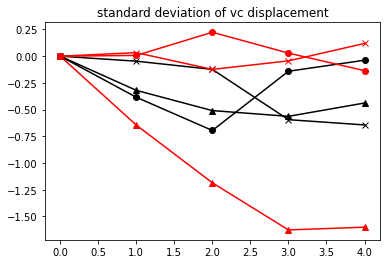

Text(0.5, 1.0, 'average of vc displacement')

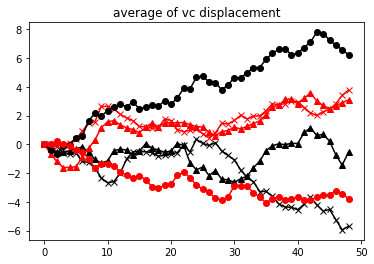

In [143]:
mean_naive=[]
mean_infec=[]

for ti in np.arange(0,50):
    x=np.mean(trajs_naive[:,ti,0])
    y=np.mean(trajs_naive[:,ti,1])
    z=np.mean(trajs_naive[:,ti,2])
    mean_naive.append([x,y,z])
    x1=np.mean(trajs_infec[:,ti,0])
    y1=np.mean(trajs_infec[:,ti,1])
    z1=np.mean(trajs_infec[:,ti,2])
    mean_infec.append([x1,y1,z1])

n=np.asarray(mean_naive)
i=np.asarray(mean_infec)

plt.plot(n[:49,0],'k-x')
plt.plot(i[:49,0],'r-x')
plt.plot(n[:49,1],'k-^')
plt.plot(i[:49,1],'r-^')
plt.plot(n[:49,2],'k-o')
plt.plot(i[:49,2],'r-o')
plt.title('average of vc displacement')

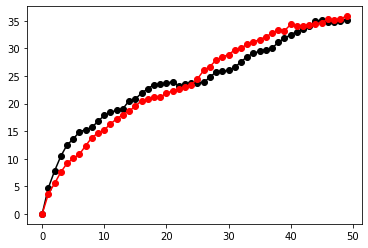

In [ ]:
n[14,:]

In [ ]:
theads[14]

In [ ]:
theads_naive_macr[14]

In [ ]:
ds_naive[14].show_data_structure()

In [ ]:
a=np.asarray(ds_naive[14].h5f['[D9] volume centers'])

In [ ]:
a

In [ ]:
trajs_naive[91,14,:]

In [ ]:
theads_naive_macr[91]

In [42]:
import sklearn

ModuleNotFoundError: No module named 'sklearn'

In [44]:
trajs_naive.shape

(133, 50, 3)

In [46]:
np.cumsum(np.abs([1,-1,1,-1]))

array([1, 2, 3, 4])

<Figure size 720x360 with 0 Axes>

IndexError: index 101 is out of bounds for axis 0 with size 101

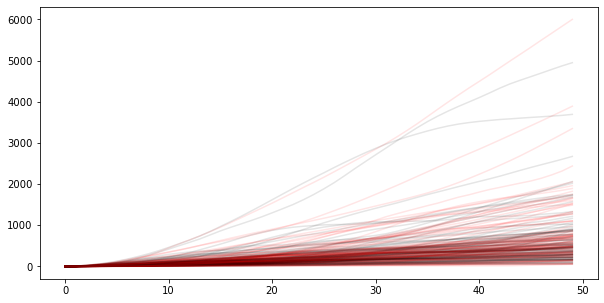

In [67]:
plt.figure(figsize=(10,5))
for i in np.arange(133):
    sn=trajs_naive[i,:,1]
    csn=np.cumsum(np.abs(sn))
    si=trajs_infec[i,:,1]
    csi=np.cumsum(np.abs(si))
#     plt.subplot(121)
    plt.plot(csn,'k',alpha=0.1)
#     plt.subplot(122)
    plt.plot(csi,'r',alpha=0.1)
    
    

<Figure size 720x360 with 0 Axes>

IndexError: index 101 is out of bounds for axis 0 with size 101

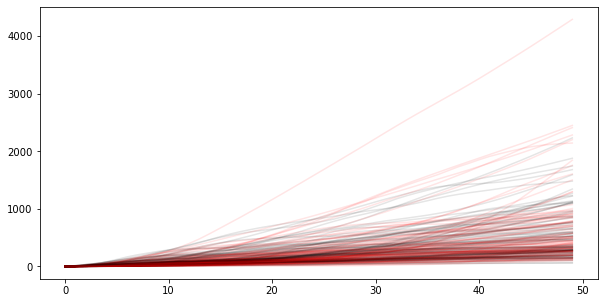

In [69]:
plt.figure(figsize=(10,5))
for i in np.arange(133):
    sn=trajs_naive[i,:,0]
    csn=np.cumsum(np.abs(sn))
    si=trajs_infec[i,:,0]
    csi=np.cumsum(np.abs(si))
#     plt.subplot(121)
    plt.plot(csn,'k',alpha=0.1)
#     plt.subplot(122)
    plt.plot(csi,'r',alpha=0.1)
    
    

In [56]:
trajs_naive.shape

(133, 50, 3)

In [62]:
cumsum_naive=np.cumsum(np.abs(trajs_naive),axis=1)
cumsum_infec=np.cumsum(np.abs(trajs_infec),axis=1)


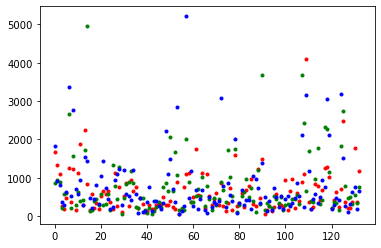

In [66]:
plt.plot(cumsum_naive[:,49,0],'r.')
plt.plot(cumsum_naive[:,49,1],'g.')
plt.plot(cumsum_naive[:,49,2],'b.')


<Figure size 1080x360 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

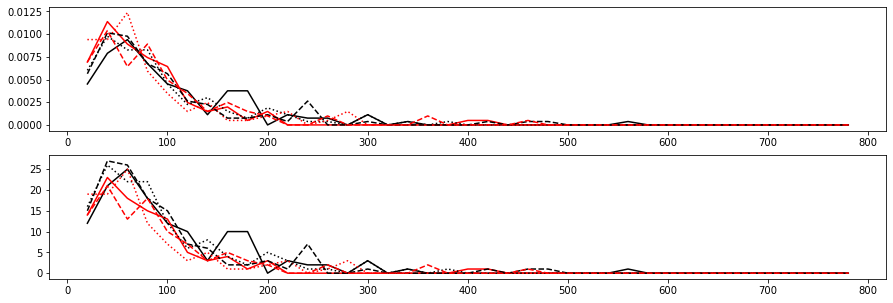

In [132]:
plt.figure(figsize=(15,5))
dT=10
bins0=np.arange(0,800,20)
plt.subplot(211)
[na,nb]=np.histogram(cumsum_naive[:,dT,2],bins=bins0,density=True)
[ia,ib]=np.histogram(cumsum_infec[:,dT,2],bins=bins0,density=True)
plt.plot(nb[1:],na,'k')
plt.plot(ib[1:],ia,'r')
[na,nb]=np.histogram(cumsum_naive[:,dT,0],bins=bins0,density=True)
[ia,ib]=np.histogram(cumsum_infec[:,dT,0],bins=bins0,density=True)
plt.plot(nb[1:],na,'k:')
plt.plot(ib[1:],ia,'r:')
[na,nb]=np.histogram(cumsum_naive[:,dT,1],bins=bins0,density=True)
[ia,ib]=np.histogram(cumsum_infec[:,dT,1],bins=bins0,density=True)
plt.plot(nb[1:],na,'k--')
plt.plot(ib[1:],ia,'r--')

plt.subplot(212)
[na,nb]=np.histogram(cumsum_naive[:,dT,2],bins=bins0,density=False)
[ia,ib]=np.histogram(cumsum_infec[:,dT,2],bins=bins0,density=False)
plt.plot(nb[1:],na,'k')
plt.plot(ib[1:],ia,'r')
[na,nb]=np.histogram(cumsum_naive[:,dT,0],bins=bins0,density=False)
[ia,ib]=np.histogram(cumsum_infec[:,dT,0],bins=bins0,density=False)
plt.plot(nb[1:],na,'k:')
plt.plot(ib[1:],ia,'r:')
[na,nb]=np.histogram(cumsum_naive[:,dT,1],bins=bins0,density=False)
[ia,ib]=np.histogram(cumsum_infec[:,dT,1],bins=bins0,density=False)
plt.plot(nb[1:],na,'k--')
plt.plot(ib[1:],ia,'r--')


<Figure size 1080x360 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

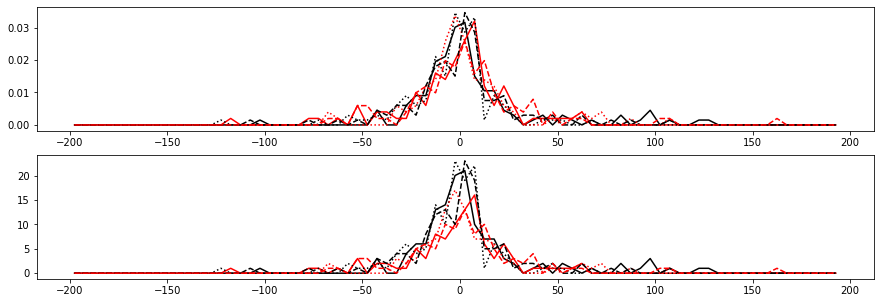

In [140]:

plt.figure(figsize=(15,5))
dT=40
bins0=np.arange(-200,200,5)
plt.subplot(211)
[na,nb]=np.histogram(trajs_naive[:,dT,2],bins=bins0,density=True)
[ia,ib]=np.histogram(trajs_infec[:,dT,2],bins=bins0,density=True)
plt.plot((nb[1:]+nb[:-1])/2,na,'k')
plt.plot((ib[1:]+ib[:-1])/2,ia,'r')
[na,nb]=np.histogram(trajs_naive[:,dT,0],bins=bins0,density=True)
[ia,ib]=np.histogram(trajs_infec[:,dT,0],bins=bins0,density=True)
plt.plot((nb[1:]+nb[:-1])/2,na,'k:')
plt.plot((ib[1:]+ib[:-1])/2,ia,'r:')
[na,nb]=np.histogram(trajs_naive[:,dT,1],bins=bins0,density=True)
[ia,ib]=np.histogram(trajs_infec[:,dT,1],bins=bins0,density=True)
plt.plot((nb[1:]+nb[:-1])/2,na,'k--')
plt.plot((ib[1:]+ib[:-1])/2,ia,'r--')

plt.subplot(212)
[na,nb]=np.histogram(trajs_naive[:,dT,2],bins=bins0,density=False)
[ia,ib]=np.histogram(trajs_infec[:,dT,2],bins=bins0,density=False)
plt.plot((nb[1:]+nb[:-1])/2,na,'k')
plt.plot((ib[1:]+ib[:-1])/2,ia,'r')
[na,nb]=np.histogram(trajs_naive[:,dT,0],bins=bins0,density=False)
[ia,ib]=np.histogram(trajs_infec[:,dT,0],bins=bins0,density=False)
plt.plot((nb[1:]+nb[:-1])/2,na,'k:')
plt.plot((ib[1:]+ib[:-1])/2,ia,'r:')
[na,nb]=np.histogram(trajs_naive[:,dT,1],bins=bins0,density=False)
[ia,ib]=np.histogram(trajs_infec[:,dT,1],bins=bins0,density=False)
plt.plot((nb[1:]+nb[:-1])/2,na,'k--')
plt.plot((ib[1:]+ib[:-1])/2,ia,'r--')


<Figure size 1080x360 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

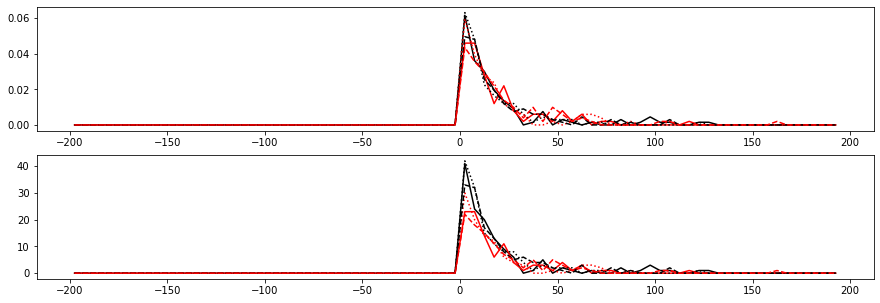

In [141]:

plt.figure(figsize=(15,5))
dT=40
bins0=np.arange(-200,200,5)
plt.subplot(211)
[na,nb]=np.histogram(abs(trajs_naive[:,dT,2]),bins=bins0,density=True)
[ia,ib]=np.histogram(abs(trajs_infec[:,dT,2]),bins=bins0,density=True)
plt.plot((nb[1:]+nb[:-1])/2,na,'k')
plt.plot((ib[1:]+ib[:-1])/2,ia,'r')
[na,nb]=np.histogram(abs(trajs_naive[:,dT,0]),bins=bins0,density=True)
[ia,ib]=np.histogram(abs(trajs_infec[:,dT,0]),bins=bins0,density=True)
plt.plot((nb[1:]+nb[:-1])/2,na,'k:')
plt.plot((ib[1:]+ib[:-1])/2,ia,'r:')
[na,nb]=np.histogram(abs(trajs_naive[:,dT,1]),bins=bins0,density=True)
[ia,ib]=np.histogram(abs(trajs_infec[:,dT,1]),bins=bins0,density=True)
plt.plot((nb[1:]+nb[:-1])/2,na,'k--')
plt.plot((ib[1:]+ib[:-1])/2,ia,'r--')

plt.subplot(212)
[na,nb]=np.histogram(abs(trajs_naive[:,dT,2]),bins=bins0,density=False)
[ia,ib]=np.histogram(abs(trajs_infec[:,dT,2]),bins=bins0,density=False)
plt.plot((nb[1:]+nb[:-1])/2,na,'k')
plt.plot((ib[1:]+ib[:-1])/2,ia,'r')
[na,nb]=np.histogram(abs(trajs_naive[:,dT,0]),bins=bins0,density=False)
[ia,ib]=np.histogram(abs(trajs_infec[:,dT,0]),bins=bins0,density=False)
plt.plot((nb[1:]+nb[:-1])/2,na,'k:')
plt.plot((ib[1:]+ib[:-1])/2,ia,'r:')
[na,nb]=np.histogram(abs(trajs_naive[:,dT,1]),bins=bins0,density=False)
[ia,ib]=np.histogram(abs(trajs_infec[:,dT,1]),bins=bins0,density=False)
plt.plot((nb[1:]+nb[:-1])/2,na,'k--')
plt.plot((ib[1:]+ib[:-1])/2,ia,'r--')
